# **Car Price Prediction**

**Implement Regression Analysis to predict the price of cars with the available independent variables.**

## **Dataset:**

1. **Car_ID:** Unique id of each observation (Interger)
2. **Symboling:** Its assigned insurance risk rating, A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.(Categorical) 
3. **carCompany:** Name of car company (Categorical)
4. **fueltype:** Car fuel type i.e gas or diesel (Categorical)
5. **aspiration:** Aspiration used in a car (Categorical)
6. **doornumber:** Number of doors in a car (Categorical)
7. **carbody:**	body of car (Categorical)
8. **drivewheel:** type of drive wheel (Categorical)
9. **enginelocation:** Location of car engine (Categorical)
10. **wheelbase:** Weelbase of car (Numeric)
11. **carlength:** Length of car (Numeric)
12.	**carwidth:** Width of car (Numeric)
13.	**carheight:** height of car (Numeric)
14.	**curbweight:** The weight of a car without occupants or baggage. (Numeric)
15. **enginetype:**	Type of engine. (Categorical)
16.	**cylindernumber:**	cylinder placed in the car (Categorical)
17.	**enginesize:**	Size of car (Numeric)
18.	**fuelsystem:**	Fuel system of car (Categorical)
19.	**boreratio:** Boreratio of car (Numeric)
20.	**stroke:**	Stroke or volume inside the engine (Numeric)
21.	**compressionratio:** compression ratio of car (Numeric)
22.	**horsepower:**	Horsepower (Numeric)
23.	**peakrpm:** car peak rpm (Numeric)
24.	**citympg:** Mileage in city (Numeric)
25.	**highwaympg:**	Mileage on highway (Numeric)
26.	**price(Dependent variable):** Price of car (Numeric)


In [205]:
# Write Code Here
import warnings
warnings.filterwarnings('ignore')

#importing the libraries
from math import sqrt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [206]:
df = pd.read_csv('/content/Car_Prices.csv')
df.head(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [208]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [209]:
df.drop_duplicates(inplace=True)

In [210]:
# dataset shape
print("Dataset contains",df.shape[0],"rows and",df.shape[1],"columns")

Dataset contains 205 rows and 26 columns


In [211]:
#Splitting company name from CarName column
CompanyName = df['CarName'].apply(lambda x : x.split(' ')[0])
df.insert(3,"CompanyName",CompanyName)
df.drop(['CarName'],axis=1,inplace=True)
df.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [212]:
df.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [213]:
df.CompanyName = df.CompanyName.str.lower()

def replace_name(a,b):
    df.CompanyName.replace(a,b,inplace=True)

replace_name('maxda','mazda')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')

df.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [214]:
#Fuel economy
df['fueleconomy'] = (0.55 * df['citympg']) + (0.45 * df['highwaympg'])

In [215]:
#Binning the Car Companies based on avg prices of each Company.
df['price'] = df['price'].astype('int')
temp = df.copy()
table = temp.groupby(['CompanyName'])['price'].mean()
temp = temp.merge(table.reset_index(), how='left',on='CompanyName')
bins = [0,10000,20000,40000]
cars_bin=['Budget','Medium','Highend']
df['carsrange'] = pd.cut(temp['price_y'],bins,right=False,labels=cars_bin)
df.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueleconomy,carsrange
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495,23.70,Medium
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500,23.70,Medium
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500,22.15,Medium
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950,26.70,Medium
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450,19.80,Medium


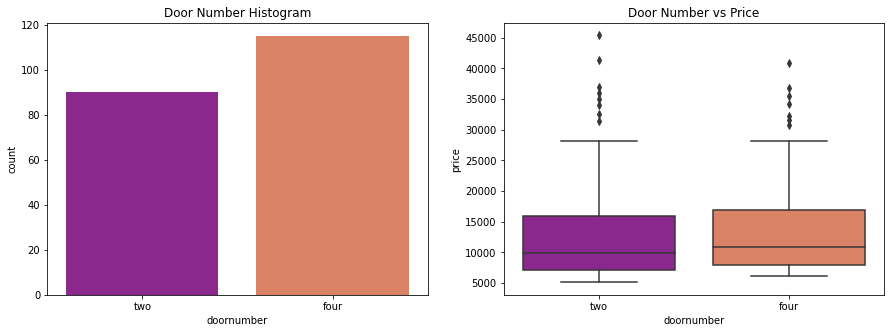

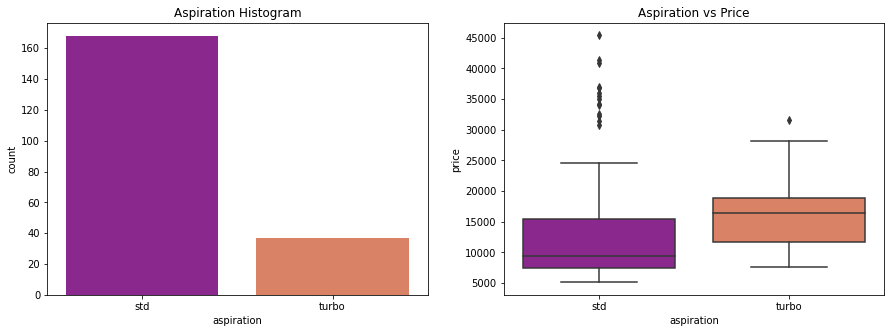

In [201]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Door Number Histogram')
sns.countplot(df.doornumber, palette=("plasma"))

plt.subplot(1,2,2)
plt.title('Door Number vs Price')
sns.boxplot(x=df.doornumber, y=df.price, palette=("plasma"))

plt.show()

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Aspiration Histogram')
sns.countplot(df.aspiration, palette=("plasma"))

plt.subplot(1,2,2)
plt.title('Aspiration vs Price')
sns.boxplot(x=df.aspiration, y=df.price, palette=("plasma"))

plt.show()

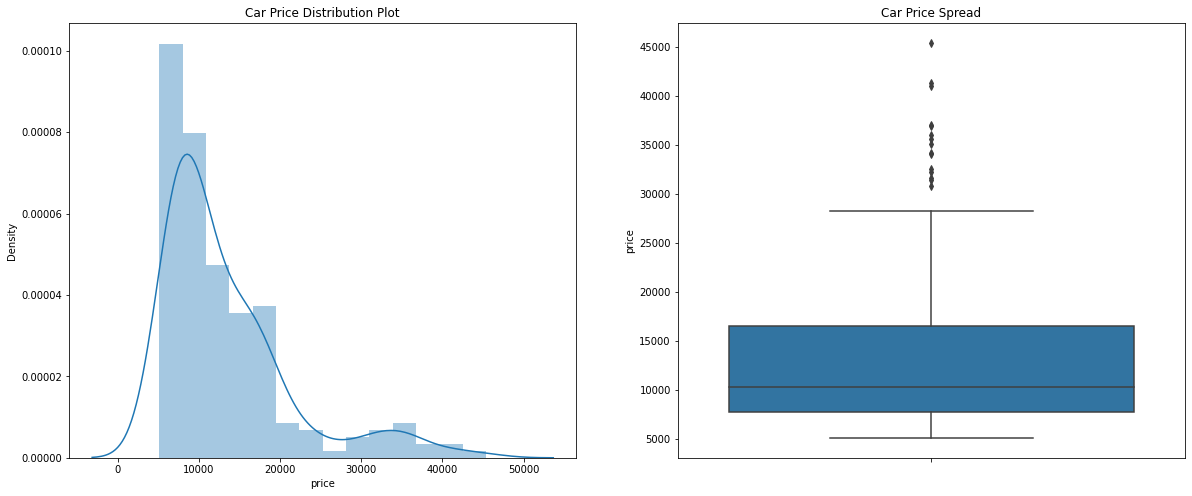

In [169]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(df.price)

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=df.price)

plt.show()

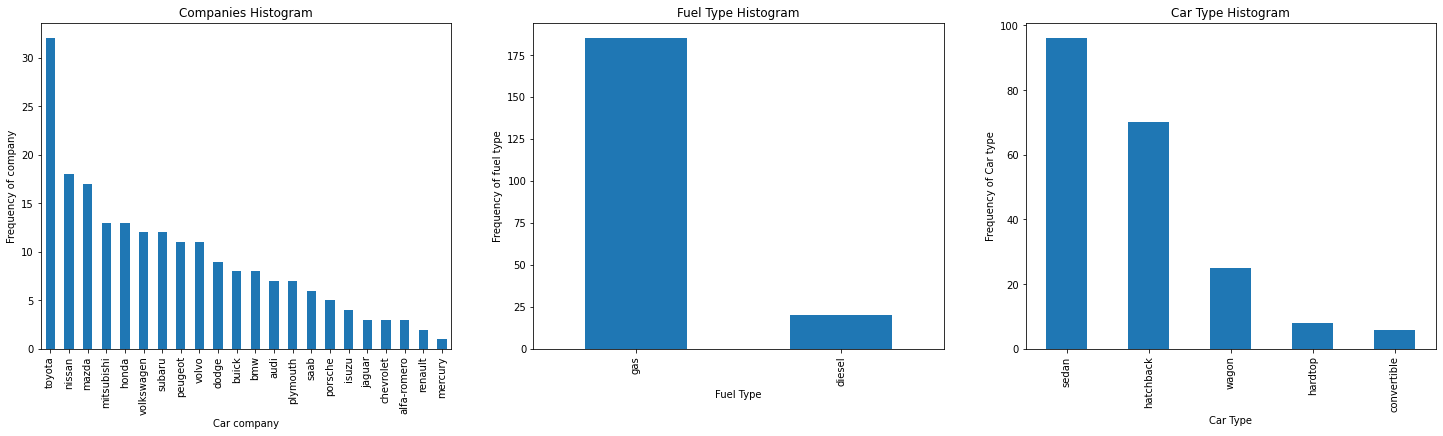

In [170]:
plt.figure(figsize=(25, 6))

plt.subplot(1,3,1)
plt1 = df.CompanyName.value_counts().plot(kind = 'bar')
plt.title('Companies Histogram')
plt1.set(xlabel = 'Car company', ylabel='Frequency of company')

plt.subplot(1,3,2)
plt1 = df.fueltype.value_counts().plot(kind = 'bar')
plt.title('Fuel Type Histogram')
plt1.set(xlabel = 'Fuel Type', ylabel='Frequency of fuel type')

plt.subplot(1,3,3)
plt1 = df.carbody.value_counts().plot(kind = 'bar')
plt.title('Car Type Histogram')
plt1.set(xlabel = 'Car Type', ylabel='Frequency of Car type')

plt.show()

<Figure size 1800x432 with 0 Axes>

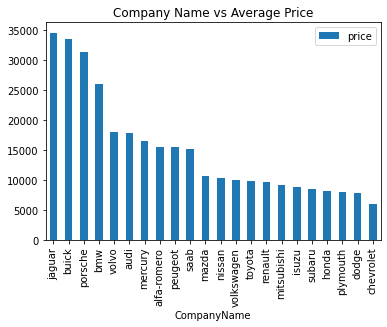

In [173]:
plt.figure(figsize=(25, 6))

df = pd.DataFrame(df.groupby(['CompanyName'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Company Name vs Average Price')
plt.show()


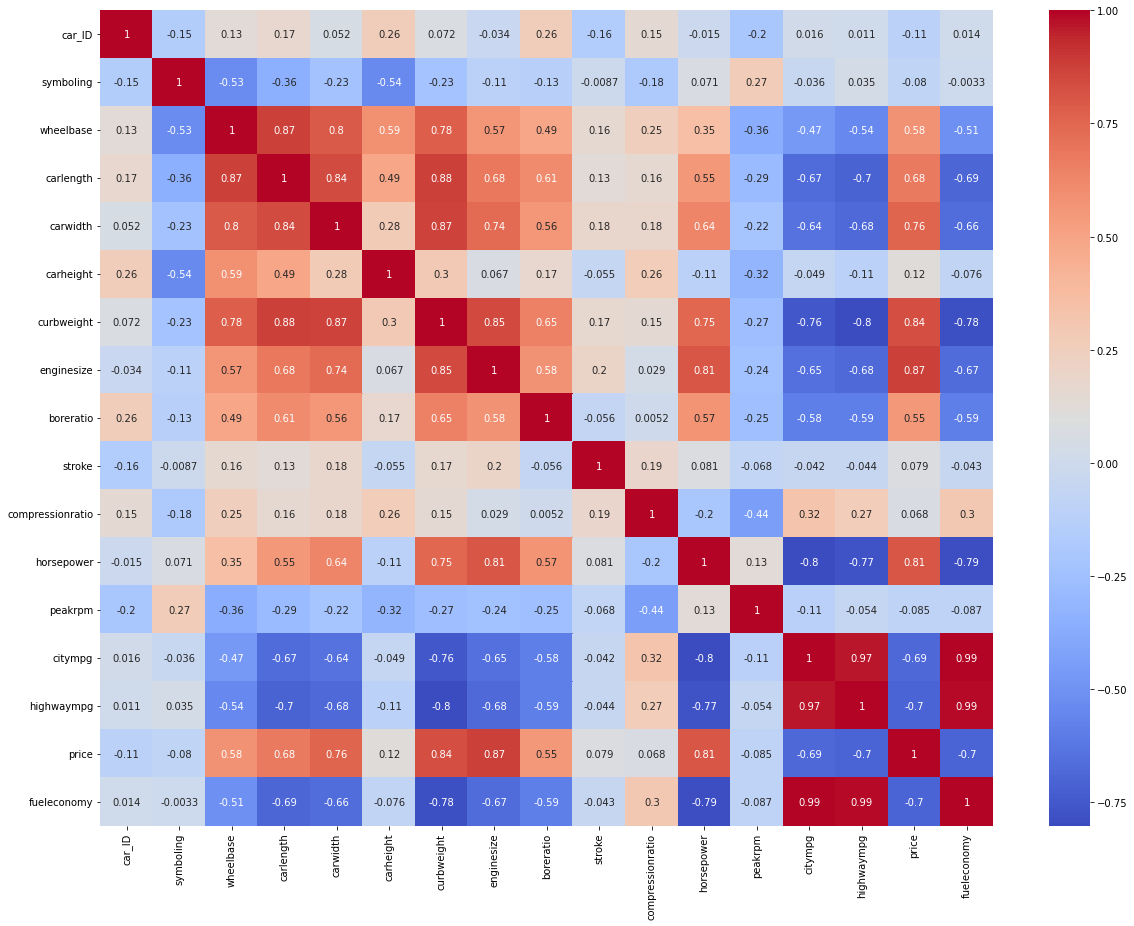

In [202]:
plt.figure(figsize=(20, 15))
correlations = df.corr()
sns.heatmap(correlations, cmap="coolwarm", annot=True)
plt.show()

In [216]:
df = df.drop(['carheight' ,'stroke' ,'compressionratio' ,
                  'peakrpm' ,'carlength' ,'carwidth' ,'curbweight' ,'enginesize' ,'highwaympg','fueleconomy','carsrange','car_ID'], axis=1)
# Wheelbase , carlength, carwidth and curbweight [ 0.80 - 0.88 ] are very correlated and we have to keep only one between them.
# Horsepower and enginesize are highly correlated and we need to keep only one.
# citympg and  are highly correlated and we need to keep one of them.
df.head()

,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,enginetype,cylindernumber,fuelsystem,boreratio,horsepower,citympg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,dohc,four,mpfi,3.47,111,21,13495
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,dohc,four,mpfi,3.47,111,21,16500
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,ohcv,six,mpfi,2.68,154,19,16500
3,2,audi,gas,std,four,sedan,fwd,front,99.8,ohc,four,mpfi,3.19,102,24,13950
4,2,audi,gas,std,four,sedan,4wd,front,99.4,ohc,five,mpfi,3.19,115,18,17450


In [217]:
predict = "price"
data = df[["symboling", "wheelbase", "boreratio", "horsepower", 
             "citympg", "price"]]
features = np.array(data.drop([predict], 1))
target = np.array(data[predict])

X_train , X_test, y_train , y_test = train_test_split(features, target, test_size=0.3, random_state=42)

for each in [X_train , X_test, y_train, y_test]:
    print(f"Shape: {each.shape}")

Shape: (143, 5)
Shape: (62, 5)
Shape: (143,)
Shape: (62,)


In [218]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

print(f"Bias: {linear_model.intercept_}")
print(f"Weights (m1, m2, ...., mn): \n\n{linear_model.coef_}")

Bias: -53019.73362166515
Weights (m1, m2, ...., mn): 

[817.36736612 524.51132878 -50.57767256 131.62597438   4.10351865]


In [219]:
train_preds = linear_model.predict(X_train)
test_preds = linear_model.predict(X_test)

In [220]:
def rmse_calculation(actual_train, pred_train, actual_test, pred_test):
    return f"RMSE Train: {sqrt(mean_squared_error(actual_train , pred_train)):.3f}\nRMSE Test: {sqrt(mean_squared_error(actual_test , pred_test)):.3f}"

In [221]:
def score_calculation(model, X_train, X_test, y_train , y_test):
    return f"Train Score: {model.score(X_train, y_train)*100:.3f}\nTest Score: {model.score(X_test, y_test)*100:.3f}" 

In [222]:
print(score_calculation(linear_model, X_train, X_test, y_train, y_test))
print('-'*25)
print(rmse_calculation(y_train, train_preds, y_test, test_preds))

Train Score: 76.494
Test Score: 72.529
-------------------------
RMSE Train: 3785.042
RMSE Test: 4362.724


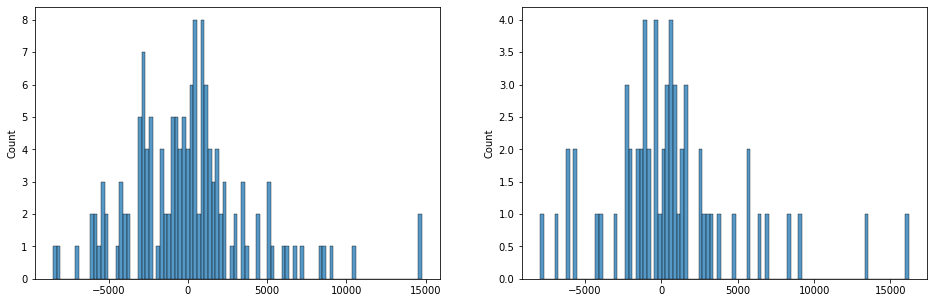

In [223]:
train_error = (y_train - train_preds)
test_error = (y_test - test_preds)

fig = plt.figure(figsize=(16,5))
ax1 = fig.add_subplot(121)
sns.histplot(train_error, bins=100)

ax2 = fig.add_subplot(122)
sns.histplot(test_error, bins=100)
plt.show()
plt.close()

In [224]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_absolute_error as mse

print("RMSE", np.sqrt(mse(y_test, test_preds)))

RMSE 54.43771471850215
